In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

C:\Users\Thaomy\AppData\Local\Temp\ipykernel_50508\2999099242.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Questions and Answers
1. Plot PC1 vs PC2: see below
2. I think only 1 principal components are needed to capture most of the variability because PC1 captures 99.08% of the variability.
3. The direction that the waves are coming from (MWD) contributes the most to PC1, with a contribution of -0.999. For PC2 (0.57% variability explained), dominant wave period (DPD) contributes the most with a contribution of -0.923.
4. The linear dimensionality reduction method performed well (it was able to reduce the 5 variables to essentially just 1 dimension), which tells me that the variance in this dataset can be explained by a large variance in 1 variable (MWD).

In [2]:
df = pd.read_csv('Waves_2023.txt', sep='\s+') 
df

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Thaomy\AppData\Local\Temp\ipykernel_50508\1307068610.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('Waves_2023.txt', sep='\s+')


,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2023,1,1,0,26,999,99.0,99.0,1.12,12.50,7.69,269,9999.0,999.0,15.3,999.0,99.0,99.0
1,2023,1,1,0,56,999,99.0,99.0,1.16,11.76,7.34,272,9999.0,999.0,15.3,999.0,99.0,99.0
2,2023,1,1,1,26,999,99.0,99.0,1.20,12.50,7.08,268,9999.0,999.0,15.3,999.0,99.0,99.0
3,2023,1,1,1,56,999,99.0,99.0,1.25,10.53,7.33,268,9999.0,999.0,15.4,999.0,99.0,99.0
4,2023,1,1,2,26,999,99.0,99.0,1.27,10.53,7.57,268,9999.0,999.0,15.5,999.0,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17280,2023,12,31,21,56,999,99.0,99.0,2.01,14.29,11.19,270,9999.0,999.0,16.7,999.0,99.0,99.0
17281,2023,12,31,22,26,999,99.0,99.0,1.75,15.38,10.37,267,9999.0,999.0,16.7,999.0,99.0,99.0
17282,2023,12,31,22,56,999,99.0,99.0,1.79,13.33,10.50,268,9999.0,999.0,16.8,999.0,99.0,99.0
17283,2023,12,31,23,26,999,99.0,99.0,1.66,14.29,10.32,271,9999.0,999.0,16.8,999.0,99.0,99.0


In [13]:
df1 = df[['WVHT', 'DPD', 'APD', 'MWD', 'WTMP']]

<Axes: >

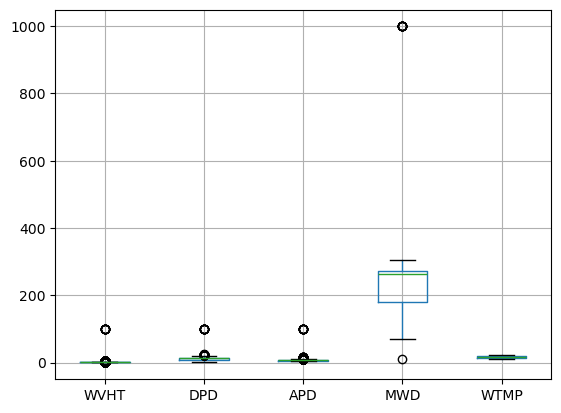

In [14]:
df1.boxplot()

In [15]:
df1 = df1[(df1.WVHT < 99) | (df1.DPD < 99) | (df1.APD < 99) | (df1.MWD < 990)]
df1

,WVHT,DPD,APD,MWD,WTMP
0,1.12,12.50,7.69,269,15.3
1,1.16,11.76,7.34,272,15.3
2,1.20,12.50,7.08,268,15.3
3,1.25,10.53,7.33,268,15.4
4,1.27,10.53,7.57,268,15.5
...,...,...,...,...,...
17280,2.01,14.29,11.19,270,16.7
17281,1.75,15.38,10.37,267,16.7
17282,1.79,13.33,10.50,268,16.8
17283,1.66,14.29,10.32,271,16.8


In [16]:
X = df1.to_numpy()
X

array([[  1.12,  12.5 ,   7.69, 269.  ,  15.3 ],
       [  1.16,  11.76,   7.34, 272.  ,  15.3 ],
       [  1.2 ,  12.5 ,   7.08, 268.  ,  15.3 ],
       ...,
       [  1.79,  13.33,  10.5 , 268.  ,  16.8 ],
       [  1.66,  14.29,  10.32, 271.  ,  16.8 ],
       [  1.7 ,  12.5 ,  10.54, 271.  ,  16.9 ]])

In [22]:
pca = PCA(n_components=5)
pca.fit(X)
var_exp = pca.explained_variance_ratio_
print(var_exp)

[9.90777521e-01 5.67156404e-03 2.48887556e-03 9.73144741e-04
 8.88946139e-05]


In [18]:
print(pca.components_)

[[-0.00414966  0.03483275 -0.00632252 -0.99911854  0.02217264]
 [-0.02817253 -0.92292703 -0.35324348 -0.02653793  0.14807698]
 [ 0.03730158 -0.14552072 -0.03477188 -0.02692689 -0.98767311]
 [ 0.12786551 -0.35382026  0.92602029 -0.01817485  0.02485407]
 [ 0.99068062  0.02504633 -0.12828252 -0.00158002  0.03828429]]


In [19]:
plotx = pca.transform(X)

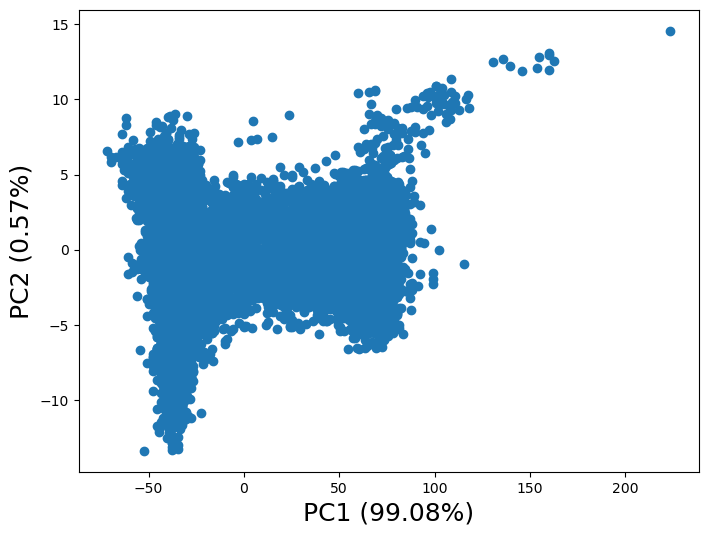

In [24]:
plt.figure(figsize=(8, 6))
plt.xlabel(f'PC1 ({var_exp[0]*100:.2f}%)', fontsize=18)
plt.ylabel(f'PC2 ({var_exp[1]*100:.2f}%)', fontsize=18)
plt.scatter(plotx[:,0], plotx[:,1])